In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# path= 'data/liver/'
path="C:\\Workplace\\C++\\d2ome_v2\\v2\\v2\\bin\\Debug\\" 
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv") and "_compar" not in p and "_Compar" not in p:
        proteinlist.append(p)  

In [3]:
data=pd.DataFrame()
for  p in proteinlist: 
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')    
    data=pd.concat([data,d])
print(data.shape)
print(data.columns)

(48009, 38)
Index(['proteinName', 'peptideSeq', 'charge', 'old_Rsquared', 'new_Rsquared',
       'NDP', 'rateconstant', 'sigma', 'Abundance', 'MassToCharge', 'RMSE',
       'selected_A1A0_count', ' selected_A2A0_count', ' selected_A2A1_count',
       'improved_timePoints', 'new_k', 'I0_percentatediffI0_percentatediff',
       'selected_io_t', 'i0', 'I0_asymptote', 'new_rmse', 'lowerci_old',
       'upperci_old', 'sigma_old', 'lowerci_new', 'upperci_new', 'sigma_new',
       'old_pearson', 'new_pearson', 'Protein', 'protien', 'peptide',
       'rsquared', 'mo', 'io_e', 'io_a1a0', 'io_a2a0', 'io_a2a1'],
      dtype='object')


In [4]:
data=data[data.NDP >=4]
data=data[data.old_Rsquared>0.95]
data=data.reset_index(drop=True)
print(data.shape)

# data=data[data.NDP >=6]
# data=data[data.old_Rsquared<0.25]
# data=data.reset_index(drop=True)
# print(data.shape)

(6795, 38)


In [5]:
data.head()

,proteinName,peptideSeq,charge,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,...,new_pearson,Protein,protien,peptide,rsquared,mo,io_e,io_a1a0,io_a2a0,io_a2a1
0,1433B_MOUSE,NLLSVAYK,2,0.953825,0.973210,12.0,0.16249,0.013771,1.432731e+09,454.26599,...,0.994301,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1433B_MOUSE,DSTLIMQLLR,2,0.985986,0.997529,12.0,0.19307,0.009791,1.747584e+09,595.33411,...,0.999524,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1433B_MOUSE,YLSEVASGENK,2,0.986787,0.996046,12.0,0.23813,0.011572,1.513652e+08,598.79327,...,0.998608,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1433B_MOUSE,YLILNATQAESK,2,0.979972,0.993527,12.0,0.26716,0.016474,1.711845e+08,675.86682,...,0.997318,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1433B_MOUSE,AVTEQGHELSNEER,3,0.984752,0.996204,12.0,0.25681,0.014046,3.332529e+07,533.58502,...,0.998252,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
selected=pd.DataFrame()
for p in data.proteinName.unique():
    d=pd.read_csv(os.path.join(path,"_compare"+p+".csv"))
    selected=pd.concat([selected,d])


print(selected.shape)
selected=selected.dropna()
print(selected.shape)

(144278, 15)
(141540, 15)


In [7]:
selected["Decoy_deviation"]=selected.exp_RIA_decoy-selected.theoRIA
selected.head(5)

,Protein,Peptide,charge,time,RSS,theta,min_rss_decoy,diff,abs_diff,perc_diff,abs_perc_diff,exp_RIA_decoy,theoRIA,min_kl,min_kl_decoy,Decoy_deviation
0,1433B_MOUSE,NLLSVAYK,2,0,0.000936,0.00,0.376617,0.000000,0.000000,0.000000,0.000000,0.109142,0.606359,-0.003070,1.109046,-0.497216
1,1433B_MOUSE,NLLSVAYK,2,1,0.000011,0.15,0.061413,-0.033410,0.033410,-0.064556,0.064556,0.336876,0.517534,-0.000789,0.143585,-0.180658
2,1433B_MOUSE,NLLSVAYK,2,2,0.000072,0.24,0.038979,-0.058956,0.058956,-0.126365,0.126365,0.361703,0.466553,0.001560,0.107810,-0.104849
3,1433B_MOUSE,NLLSVAYK,2,3,0.000276,0.40,0.000883,0.002829,0.002829,0.005776,0.005776,0.478532,0.489771,0.001444,0.000594,-0.011239
4,1433B_MOUSE,NLLSVAYK,2,9,0.000279,0.73,0.019340,-0.009702,0.009702,-0.024253,0.024253,0.336066,0.400021,0.001541,0.066709,-0.063955


In [8]:
merged=data.merge(selected,left_on=["proteinName","peptideSeq","charge"], right_on=["Protein","Peptide","charge"])[["min_kl","min_kl_decoy","Decoy_deviation","Decoy_deviation","proteinName","peptideSeq","charge","time","theta","RSS","perc_diff","min_rss_decoy","abs_perc_diff"]]
# merged=merged.dropna()
merged.shape

(51785, 13)

C:\Users\hmdebern.UTMB-USERS-M\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hmdebern.UTMB-USERS-M\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


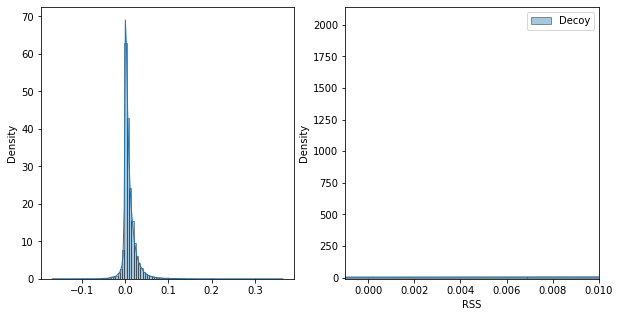

C:\Users\hmdebern.UTMB-USERS-M\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hmdebern.UTMB-USERS-M\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


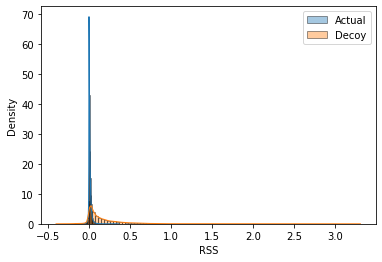

In [21]:
import math

plt.figure(figsize=(10,5))

plt.subplot(1,2,1) 
sns.distplot([x for x in 
             merged[(merged.theta>0) ].min_kl.astype(float) #(merged.abs_perc_diff<0.1)& 
             ], hist=True, kde=True, bins=100, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

plt.subplot(1,2,2) 
sns.distplot([x for x in 
             merged[(merged.theta>0) ].min_kl_decoy.astype(float) #(merged.abs_perc_diff<0.1)& 
             ], hist=True, kde=True, bins=100, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Decoy")

 

plt.xlabel("RSS")
plt.xlim([-0.001,0.01])
plt.ylim([-10,2140])
plt.legend()

plt.show()

# ==============================================================
# ==============================================================
# ==============================================================

import math

sns.distplot([x for x in 
             merged[(merged.theta>0) ].min_kl.astype(float) #(merged.abs_perc_diff<0.1)& 
             ], hist=True, kde=True, bins=100, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

plt.legend()

sns.distplot([x for x in 
             merged[(merged.theta>0) ].min_kl_decoy.astype(float) #(merged.abs_perc_diff<0.1)& 
             ], hist=True, kde=True, bins=100, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Decoy")

plt.xlabel("RSS")
# plt.xlim([-0.001,0.01])
# plt.ylim([-10,2140])
plt.legend()

In [22]:
# import math
# sns.distplot([math.log(float(x)) for x in 
#              merged[(merged.theta>0) ].min_kl.astype(float) #(merged.abs_perc_diff<0.1)& 
#              ], hist=False, kde=True,  
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 1,"bw_adjust":3},label="Actual")


# sns.distplot([math.log(float(x)) for x in 
#              merged[ (merged.theta>0) ].min_kl_decoy.astype(float) #(merged.abs_perc_diff<0.1)&
#              ], hist=False, kde=True, 
#              bins=int(180/5),  
#              hist_kws={'edgecolor':'black' },
#              kde_kws={'linewidth': 1,"bw_adjust":3},label="Decoy")

# plt.xlabel("log(RSS)")

# plt.legend()

In [23]:
temp_merged=merged[(merged.theta>0) ].sort_values(by="RSS")

In [24]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# %matplotlib inline
  
# # No of Data points
# # N = 500
  
# # initializing random values
# data = [x for x in temp_merged.RSS] #[math.log(x) for x in temp_merged.RSS] #np.random.randn(N)
  
# # getting data of the histogram
# count, bins_count = np.histogram(data, bins=20)
  
# # finding the PDF of the histogram using count values
# pdf = count / sum(count)
  
# # using numpy np.cumsum to calculate the CDF
# # We can also find using the PDF values by looping and adding
# cdf = np.cumsum(pdf)
  
# # plotting PDF and CDF
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
# # plt.plot(bins_count[1:], cdf, label="CDF")
# plt.legend()

In [25]:
# ## import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# %matplotlib inline
  
# # No of Data points
# N = 500
  
# # initializing random values
# data = temp_merged.min_rss_decoy #np.random.randn(N)
  
# # getting data of the histogram
# count, bins_count = np.histogram(data, bins=bins_count)
  
# # finding the PDF of the histogram using count values
# pdf = count / sum(count)
  
# # using numpy np.cumsum to calculate the CDF
# # We can also find using the PDF values by looping and adding
# cdf = np.cumsum(pdf)
  
# # plotting PDF and CDF
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
# # plt.plot(bins_count[1:], cdf, label="CDF")
# plt.legend()

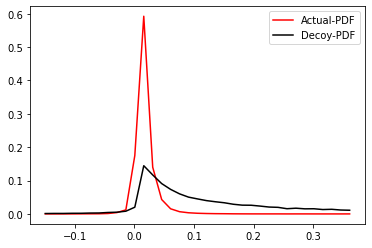

In [26]:

# initializing random values
data = temp_merged.min_kl #np.random.randn(N)
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=35)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="Actual-PDF")
# plt.plot(bins_count[1:], cdf, label="Actual-CDF")
plt.legend()

# # ===================================================
# # ===================================================
# # ===================================================

# initializing random values
data = temp_merged.min_kl_decoy #np.random.randn(N)
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=bins_count)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="k", label="Decoy-PDF")
# plt.plot(bins_count[1:], cdf, label="Decoy-CDF")
plt.legend()



In [27]:
data.shape

(46675,)

In [29]:
# np.histogram([1, 2, 1], bins=[0, 1, 2, 3])

# np.histogram(np.arange(4), bins=np.arange(5), density=True)

# np.histogram([[1, 2, 1], [1, 0, 1]], bins=[0,1,2,3])


(array([0.25, 0.25, 0.25, 0.25]), array([0, 1, 2, 3, 4]))

(array([0., 0., 0., 0., 0., 4., 0., 0., 0., 0.]),
 array([-0.25, -0.15, -0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,
         0.65,  0.75]),
 <BarContainer object of 10 artists>)

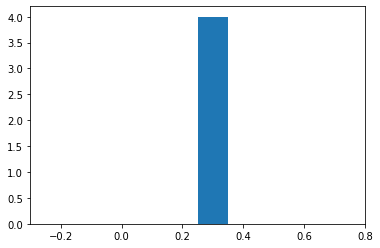

In [30]:
plt.hist()